      序号  @1、您的性别：  @2、您的年龄：  @3、您的婚姻状况：  @4、您的受教育程度是：  @5、您的政治面貌：  @7、您的信仰是：  \
0   94.0       1.0      58.0        -2.0           1.0         1.0        2.0   
1   30.0       1.0      45.0         2.0           1.0         1.0        2.0   
2   31.0       1.0      48.0         2.0           1.0         1.0        2.0   
3   93.0       1.0      74.0         2.0           2.0         2.0        2.0   
4   76.0       1.0      31.0         2.0           2.0         1.0        2.0   
5   90.0       1.0      17.0         1.0           3.0         1.0        2.0   
6   26.0       1.0      70.0         2.0           2.0         1.0        2.0   
7   68.0       1.0      12.0         1.0           2.0         1.0        2.0   
8   73.0       1.0      12.0         1.0           2.0         1.0        2.0   
9   19.0       1.0      18.0         1.0           3.0         1.0        2.0   
10  89.0       1.0      19.0         1.0           4.0         1.0        2.0   
11  24.0       2.0      19.0

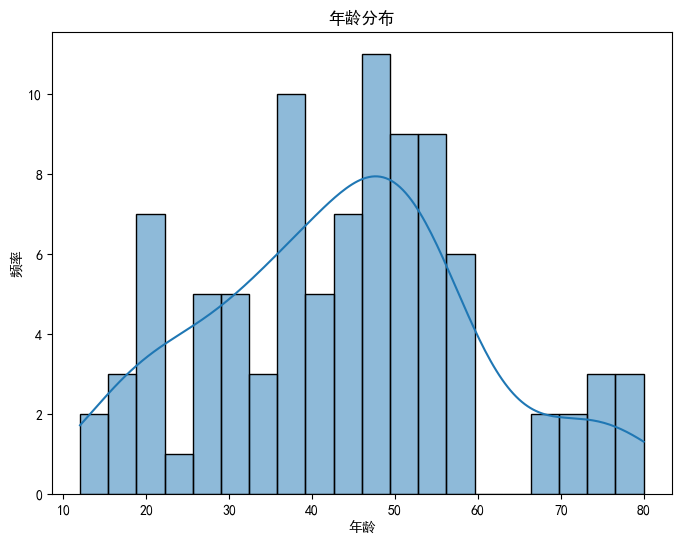

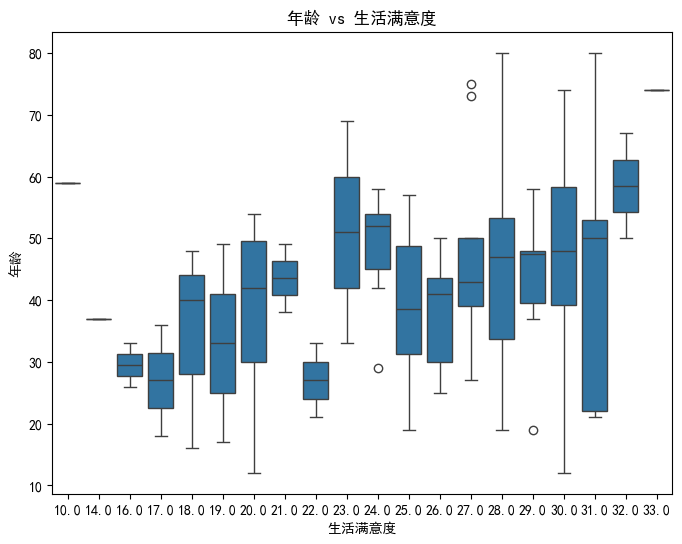

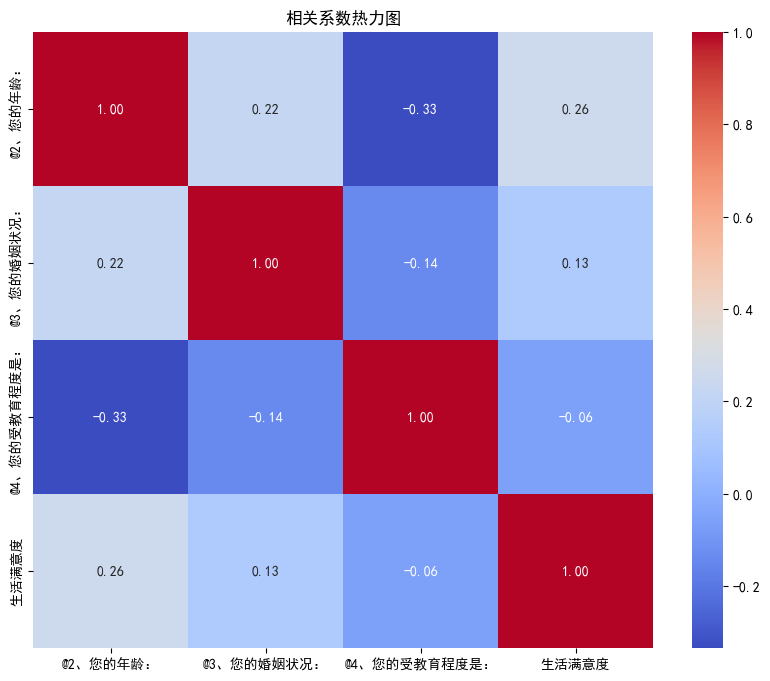

In [1]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#读取数据 命名为df
file_path = 'demo.sav'
df, _ = pyreadstat.read_sav(file_path)


pd.set_option('display.max_rows', None) # 显示所有行
pd.set_option('display.max_columns', None) # 显示所有列
pd.set_option('display.width', None) # 设置显示宽度，使所有列都能完整显示
# 显示所有数据
print(df)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号'-'显示为方块的问题

#将研究目标设为 生活满意度
target_variable = '生活满意度'

# 进行数据清洗和转换
selected_columns = ['@2、您的年龄：', '@3、您的婚姻状况：', '@4、您的受教育程度是：', target_variable]
# 去除含有缺失值的行或进行其他清洗处理
cleaned_data = df[selected_columns].dropna()

# 单变量分析，选择年龄进行分析
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data['@2、您的年龄：'], bins=20, kde=True)
plt.title('年龄分布')
plt.xlabel('年龄')
plt.ylabel('频率')
plt.show()

# 双变量分析，选择年龄和生活满意度进行分析
plt.figure(figsize=(8, 6))
sns.boxplot(x=target_variable, y='@2、您的年龄：', data=cleaned_data)
plt.title('年龄 vs 生活满意度')
plt.xlabel('生活满意度')
plt.ylabel('年龄')
plt.show()

# 多变量分析，使用相关系数矩阵
correlation_matrix = cleaned_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('相关系数热力图')
plt.show()
